In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Tamilselvan M\Downloads\ML\new_natural_disasters_2024.csv"
data = pd.read_csv(file_path)

# Show the first few rows of the dataset
data.head()


,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($),Mitigation_Measures
0,1,Wildfire,Brazil,6.267393,01-01-2024 00:00,9706,6.509790e+08,"Create fire breaks, public awareness campaigns"
1,2,Hurricane,Indonesia,6.649358,01-01-2024 01:00,2233,5.538357e+08,"Strengthen levees, evacuation drills"
2,3,Tornado,China,9.724366,01-01-2024 02:00,478,6.910998e+07,"Storm shelters, rapid response units"
3,4,Flood,India,1.702505,01-01-2024 03:00,2867,8.474880e+08,"Build flood barriers, improve drainage systems"
4,5,Flood,Brazil,7.917748,01-01-2024 04:00,776,6.449297e+08,"Build flood barriers, improve drainage systems"


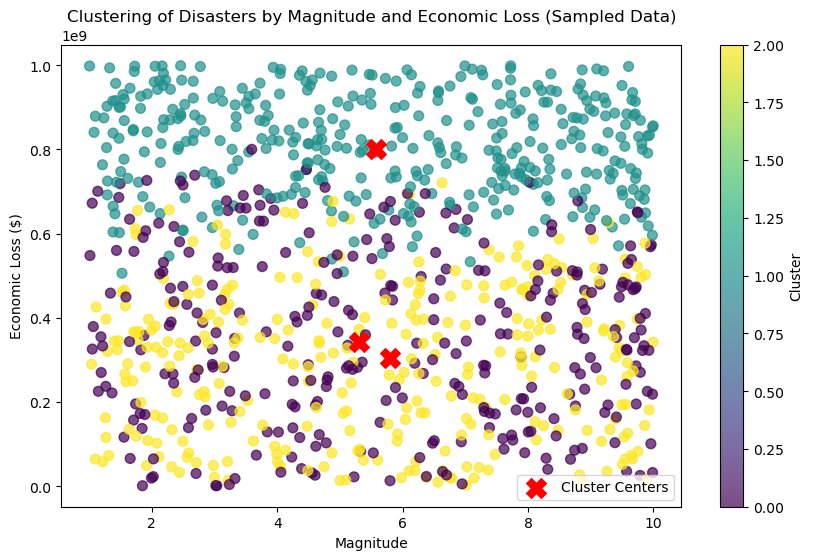

Cluster Centers (in original scale):
[[5.30622002e+00 7.78292797e+03 3.42448569e+08]
 [5.57358473e+00 4.80372008e+03 8.01650234e+08]
 [5.79560918e+00 2.39634012e+03 3.04675707e+08]]

Inertia:
17968.790659663133

Labels:
[0 2 2 ... 1 1 2]


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Select relevant numerical features for clustering
numerical_features = data[['Magnitude', 'Fatalities', 'Economic_Loss($)']]

# Standardize the data to ensure each feature contributes equally to the clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We'll try with 3 clusters for now
kmeans.fit(scaled_data)

# Add the cluster labels to the dataset
data['Cluster'] = kmeans.labels_

# Sample a subset of the data for visualization (e.g., 10% of the total data)
sample_size = int(len(data) * 0.1)  # Adjust this percentage as needed
sampled_data = data.sample(n=sample_size, random_state=42)

# Visualize the clusters using a 2D scatter plot with sampled data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(sampled_data['Magnitude'], sampled_data['Economic_Loss($)'], 
                      c=sampled_data['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Clustering of Disasters by Magnitude and Economic Loss (Sampled Data)')
plt.xlabel('Magnitude')
plt.ylabel('Economic Loss ($)')
plt.colorbar(scatter, label='Cluster')

# Plot cluster centers (inverse transform to original scale)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()
plt.show()

# Print KMeans model outputs
print("Cluster Centers (in original scale):")
print(centers)
print("\nInertia:")
print(kmeans.inertia_)
print("\nLabels:")
print(kmeans.labels_)


In [6]:
data['Cluster']

0       0
1       2
2       2
3       1
4       2
       ..
9995    0
9996    0
9997    1
9998    1
9999    2
Name: Cluster, Length: 10000, dtype: int32